In [1]:
# here in text-summarizaton we will be using 2 technique to solve this problem on any wikipedia page or from any website.
#1. Text Rank
#2. Sentence embedding(Glove)

In [2]:
#references
# https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#here we will give a url of a wiki page and extract 

def extract_text(url):
    #1.this will ping the website and return you html of a website.
    website_url  = requests.get(url).text

    #2. beautiful Soup is python package used for parsing html and xml document.
    #it create a parse tree that is use to extract data from the html page
    soup = BeautifulSoup(website_url , 'lxml')
    
    #pretiffy is use to show how the tags are used inside the html file.
    #print(soup.prettify())

    #3. extract all p tag which content text
    text = soup.find_all('p')
    content_text = []
    for text in text:
        content_text.append(text.getText())
        
    return content_text

In [3]:
def clean_data(text):
    # 1.convert list to string
    # 2.remove \n from the string
    # 3.remove square brackets
    # 4.remove every thing except alphabets
    # 5.remove extra spaces
    list_to_string = ' '.join([str(i) for i in text]) 
    clean_data = re.sub('\n' , "" , list_to_string)
    clean_data = re.sub(r'\[[0-9]*\]', " " , clean_data)
    clean_data = re.sub(r'[^a-zA-Z.]' , " " , clean_data)
    clean_data = re.sub('\s+' , " " , clean_data)
    return clean_data

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

def text_preprocessing(clean_data):
    # 1. tokenize into sentences
    # 2. lower case
    # 3. remove stopword
    
    sentence_token = sent_tokenize(clean_data)
    lower_case = [i.lower() for i in sentence_token]
    
    stop_words = stopwords.words('english')
    preprocess_data = " ".join([i for i in lower_case if i not in stop_words])
    return preprocess_data, sentence_token

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def loadGloveModel(filename):
    word_embeddings = {}
    f = open(filename + ".txt",'r', encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()
    return word_embeddings

In [6]:
def sentence_vector(text_preprocessing , model):
    sentence_vector = []
    for i in text_preprocessing:
        if len(i) != 0:
            v = sum([model.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
        else:
             v = np.zeros((100,))
        sentence_vector.append(v)
    return sentence_vector

In [7]:
def convertInSutableFormat(sentence_vector):
    sentence_vectors= []
    for i in sentence_vector:
        if type(i) != float:
            sentence_vectors.append(i)
    return sentence_vectors

In [8]:
def similarity_mat(sentence_vectors):
    sim_mat = np.zeros([len(sentence_token), len(sentence_token)])
    for i in range(len(sentence_token)):
        for j in range(len(sentence_token)):
            if i != j:
                sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]
    return sim_mat

In [9]:
if __name__ == '__main__':
    text = extract_text('https://en.wikipedia.org/wiki/Taj_Mahal')
    clean_data = clean_data(text)
    text_preprocessing, sentence_token = text_preprocessing(clean_data)
    model = loadGloveModel('../glove.6B.100d')
    sentence_vector = sentence_vector(text_preprocessing , model)
    sentence_vectors = convertInSutableFormat(sentence_vector)
    sim_mat = similarity_mat(sentence_vectors)

In [10]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [11]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentence_token)), reverse=True)
# Extract top 10 sentences as the summary
for i in range(50):
    print(ranked_sentences[i][1])

m ft per year.
billion Indian rupees million US based on values.
UNESCO documented more than million visitors in which had increased to about million in .
The remaining parts of the complex took an additional years and were completed in order of minarets mosque and jawab and gateway.
Lists of recommended travel destinations often feature the Taj Mahal which also appears in several listings of seven wonders of the modern world including the recently announced New Seven Wonders of the World a recent poll with million votes.
It took the efforts of labourers painters embroidery artists and stonecutters to shape the Taj Mahal.
In the tomb area wells were dug and filled with stone and rubble to form the footings of the tomb.
Construction of the mausoleum itself was essentially completed by while work on the outlying buildings continued for years.
He claimed it was built by a man who jailed his own father and wished to kill Hindus.
The BJP government s union minister of culture Mahesh Sharma 

In [26]:
# wordcloud
!pip install wordcloud


In [29]:
from wordcloud import WordCloud 

In [41]:
wordcloud = WordCloud(width=9800, height=9800, max_words=50).generate(text_preprocessing) 

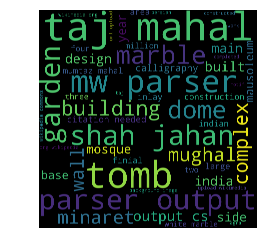

In [42]:
# plot the WordCloud image  
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
#plt.margins(x=0, y=0) 
plt.show() 